In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rcParams
rcParams['figure.figsize'] = (14, 7)
rcParams['axes.spines.top'] = False
rcParams['axes.spines.right'] = False

In [2]:
class SimpleLinearRegression:
    '''
    A class which implements simple linear regression model.
    '''
    def __init__(self):
        self.b0 = None
        self.b1 = None
    
    def fit(self, X, y):
        '''
        Used to calculate slope and intercept coefficients.
        
        :param X: array, single feature
        :param y: array, true values
        :return: None
        '''
        numerator = np.sum((X - np.mean(X)) * (y - np.mean(y)))
        denominator = np.sum((X - np.mean(X)) ** 2)
        self.b1 = numerator / denominator
        self.b0 = np.mean(y) - self.b1 * np.mean(X)
        
    def predict(self, X):
        '''
        Makes predictions using the simple line equation.
        
        :param X: array, single feature
        :return: None
        '''
        if not self.b0 or not self.b1:
            raise Exception('Please call `SimpleLinearRegression.fit(X, y)` before making predictions.')
        return self.b0 + self.b1 * X

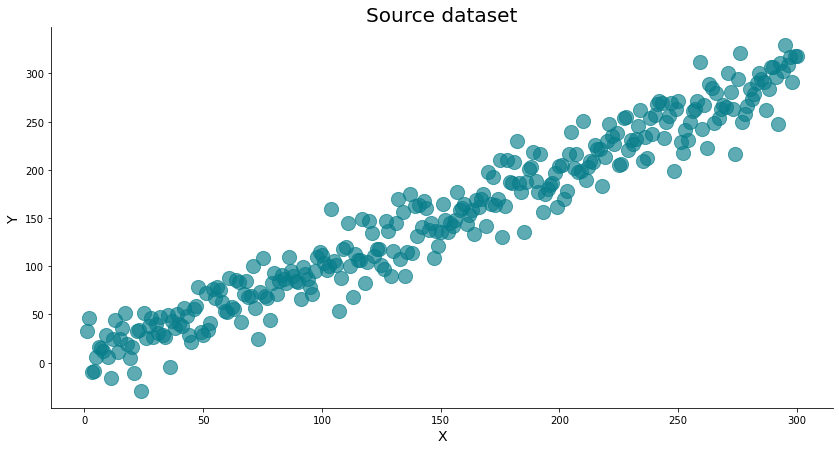

In [3]:

X = np.arange(start=1, stop=301)
y = np.random.normal(loc=X, scale=20)

plt.scatter(X, y, s=200, c='#087E8B', alpha=0.65)
plt.title('Source dataset', size=20)
plt.xlabel('X', size=14)
plt.ylabel('Y', size=14)
plt.show()

In [5]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
random_state=42)

In [6]:
model = SimpleLinearRegression()
model.fit(X_train, y_train)
preds = model.predict(X_test)

In [7]:
model.b0, model.b1

(0.3453837247556635, 1.0022012857270859)

In [9]:
preds

array([204.79444601, 267.93312701, 153.68218044,  10.36739658,
       234.86048458, 227.84507558, 197.77903701, 110.58752515,
         6.35859144, 176.73281001, 238.86928973,  58.4730583 ,
       219.8274653 ,  46.44664287, 183.74821901, 222.83406916,
       290.98375659, 212.8120563 , 149.6733753 , 166.71079716,
        79.5192853 , 114.5963303 , 250.89570516, 251.89790644,
       105.57651873,  43.44003901, 282.9661463 , 296.9969643 ,
       158.69318687, 239.87149101,  18.38500687, 165.70859587,
        34.42022744,  25.40041587, 216.82086144, 120.60953801,
         8.36299401,  91.54570073,  47.44884415,  74.50827887,
        94.55230458,  77.51488273, 287.97715273,  61.47966215,
        78.51708401,  64.48626601, 235.86268587, 230.85167944,
       112.59192773, 232.85608201, 181.74381644, 145.66457016,
       240.8736923 ,  76.51268144, 299.00136687, 279.95954244,
        98.56110973,  93.5501033 , 193.77023187,  26.40261715])

In [10]:
y_test

array([216.4830782 , 254.18392422, 135.2171287 ,   6.00611634,
       262.44023607, 254.08554128, 186.45136228, 119.57085249,
        16.24482097, 129.94351096, 253.77245264,  62.49205518,
       213.75211844,  55.76656866, 185.91462572, 235.13207428,
       306.47594529, 202.96628792, 121.29116532, 161.25110103,
        82.38078055, 113.15535798, 271.54726163, 228.59208578,
       105.43797403,  47.88866653, 278.86487912, 308.61599095,
       158.13683775, 237.16395612,  19.25675256, 168.52272352,
        27.0814794 ,  51.41943228, 221.83253837, 147.13198665,
        12.12192211,  65.76828439,  58.52979355,  73.08909188,
        87.18595842,  66.89190461, 261.92450218,  87.95566753,
        44.75632177,  85.34479371, 209.53581733, 231.0094898 ,
        99.86921444, 231.73827302, 208.22233627, 137.36009292,
       257.17245375,  69.50374256, 290.95119189, 266.48344161,
       109.10139697,  91.94878561, 156.50039422,  25.29295448])

In [11]:
from sklearn.metrics import mean_squared_error

rmse = lambda y, y_pred: np.sqrt(mean_squared_error(y, y_pred))
rmse(y_test, preds)

16.61571567651961

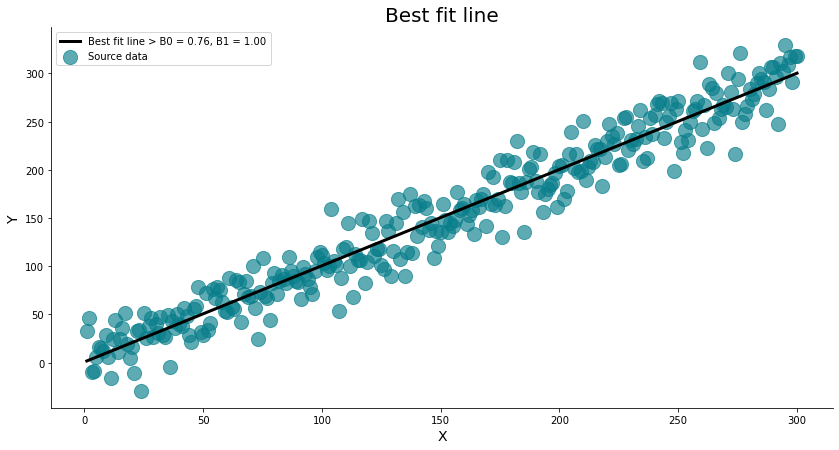

In [12]:
model_all = SimpleLinearRegression()
model_all.fit(X, y)
preds_all = model_all.predict(X)

plt.scatter(X, y, s=200, c='#087E8B', alpha=0.65, label='Source data')
plt.plot(X, preds_all, color='#000000', lw=3, label=f'Best fit line > B0 = {model_all.b0:.2f}, B1 = {model_all.b1:.2f}')
plt.title('Best fit line', size=20)
plt.xlabel('X', size=14)
plt.ylabel('Y', size=14)
plt.legend()
plt.show()


In [13]:
from sklearn.linear_model import LinearRegression

sk_model = LinearRegression()
sk_model.fit(np.array(X_train).reshape(-1, 1), y_train)
sk_preds = sk_model.predict(np.array(X_test).reshape(-1, 1))

sk_model.intercept_, sk_model.coef_

(0.3453837247556635, array([1.00220129]))

In [14]:
rmse(y_test, sk_preds)

16.61571567651961